In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import numpy.linalg

In [2]:
def f(x):
    return x**4 - 11 * x**3 + 41 * x**2 -61 * x + 30

x = np.linspace(0, 6, 1000)
y = f(x)

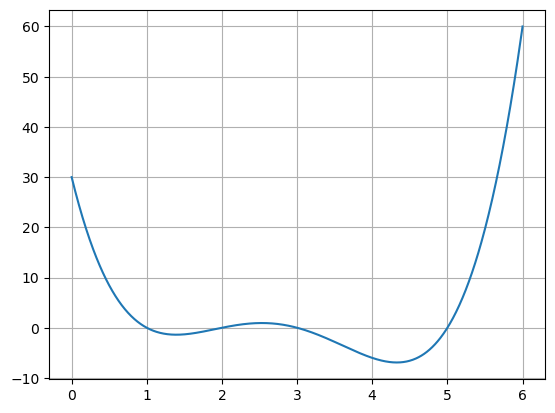

In [3]:
plt.grid()
plt.plot(x, y)

## Descente de gradient

In [4]:
def df(x):
    return 4 * x**3 - 33 * x**2 + 82 * x - 61

dy =  df(x) 

In [5]:
def tangente(x0):
    x = np.linspace(x0 - .2, x0 + .2, 100)
    y = df(x0) * (x - x0) + f(x0)
    return x, y

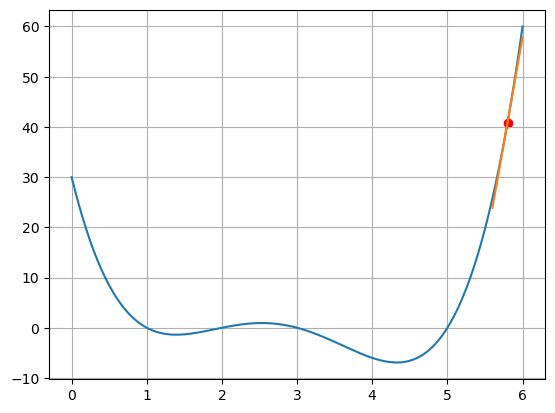

In [6]:
x0 = 5.8
xt, yt = tangente(x0)
plt.grid()
plt.plot(x, y)
plt.plot(xt, yt)
plt.scatter(x0, f(x0), c='red')

In [7]:
df(x0)

84.92799999999983

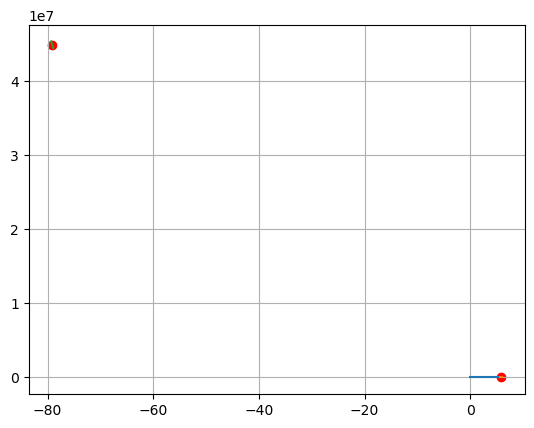

In [8]:
x0 =  5.8
xt0, yt0 = tangente(x0)
x1 = x0 - df(x0)
xt1, yt1 = tangente(x1)
plt.grid()
plt.plot(x, y)
plt.plot(xt0, yt0)
plt.plot(xt1, yt1)
plt.scatter(x0, f(x0), c='red')
plt.scatter(x1, f(x1), c='red')

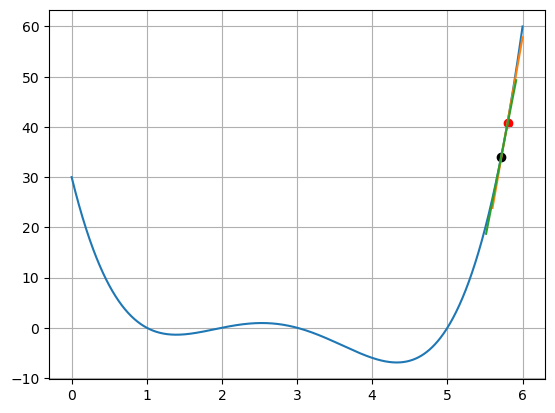

In [9]:
eta = .001
x0 =  5.8
xt0, yt0 = tangente(x0)
x1 = x0 - eta * df(x0)
xt1, yt1 = tangente(x1)
plt.grid()
plt.plot(x, y)
plt.plot(xt0, yt0)
plt.plot(xt1, yt1)
plt.scatter(x0, f(x0), c='red')
plt.scatter(x1, f(x1), c='black')

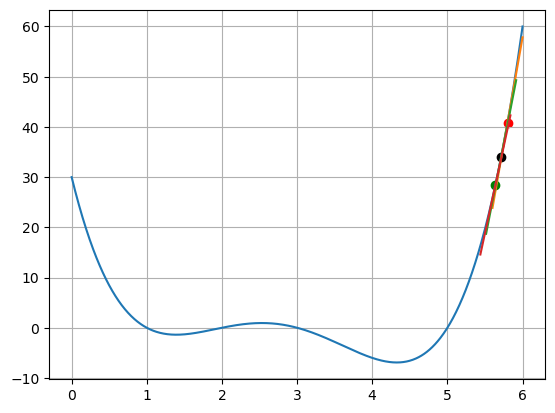

In [10]:
eta = .001

x0 =  5.8
x1 = x0 - eta * df(x0)
x2 = x1 - eta * df(x1)

xt0, yt0 = tangente(x0)
xt1, yt1 = tangente(x1)
xt2, yt2 = tangente(x2)

plt.grid()
plt.plot(x, y)
plt.plot(xt0, yt0)
plt.plot(xt1, yt1)
plt.plot(xt2, yt2)
plt.scatter(x0, f(x0), c='red')
plt.scatter(x1, f(x1), c='black')
plt.scatter(x2, f(x2), c='green')

In [11]:
def myplot(x_current):
    plt.plot(x, y)
    #xt, yt = tangente(x_current)
    #plt.plot(xt, yt)
    plt.scatter(x_current,f(x_current)) 

argmin:  4.326345463688797
f(argmin):  -6.91409678876613
df(argmin):  6.972925348236458e-09


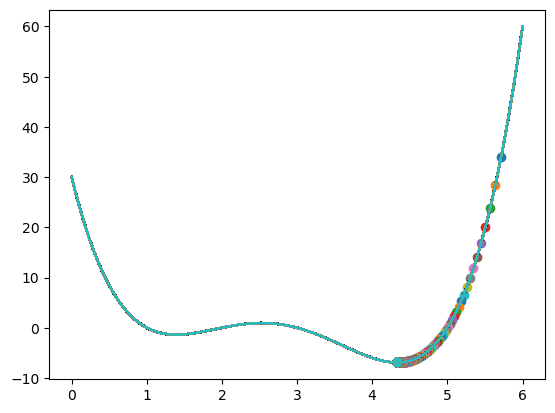

In [12]:
eta = .001
nb = 1000 #300# 200 #100 #20

x_current =  5.8
for i in range(nb):
    x_current = x_current - eta * df(x_current)
    myplot(x_current)
    
print('argmin: ', x_current)
print('f(argmin): ', f(x_current))
print('df(argmin): ', df(x_current))      


argmin:  4.326391329571001
f(argmin):  -6.914096766604757
df(argmin):  0.0009663666136248139


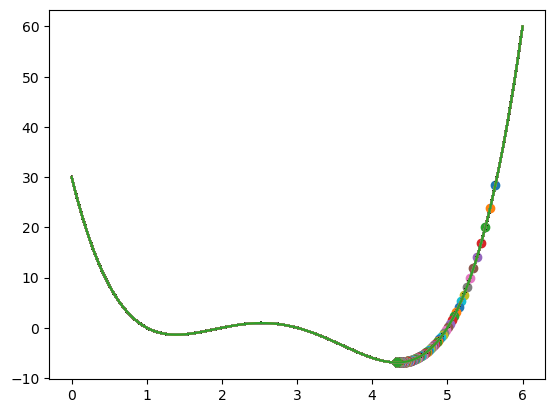

In [13]:
eta = .001
epsilon = .000001 #.00001 #.0001 #0.001 #.01

x_prec =  5.8
x_current = x_prec - eta * df(x_prec)
while np.abs(x_prec - x_current) > epsilon:
    x_prec = x_current
    x_current = x_current - eta * df(x_current)
    myplot(x_current)

print('argmin: ', x_current)
print('f(argmin): ', f(x_current))
print('df(argmin): ', df(x_current))  

argmin:  4.326391329571001
f(argmin):  -6.914096766604757
df(argmin):  0.0009663666136248139
nombre iterations : 444


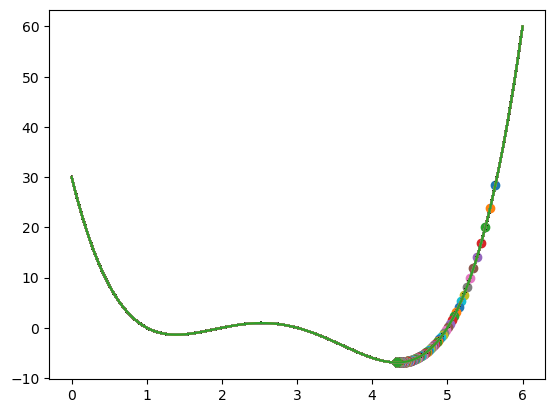

In [14]:
eta = .001
epsilon = .000001 #.00001 #.0001 #0.001 #.01

nb_iter = 1
x_prec =  5.8
x_current = x_prec - eta * df(x_prec)
while np.abs(x_prec - x_current) > epsilon:
    x_prec = x_current
    x_current = x_current - eta * df(x_current)
    nb_iter += 1
    myplot(x_current)

print('argmin: ', x_current)
print('f(argmin): ', f(x_current))
print('df(argmin): ', df(x_current))  
print('nombre iterations :' , nb_iter)


## Momentum

argmin:  1.3926745528353317
f(argmin):  -1.3827490934356135
df(argmin):  -0.0009807664520309345
nombre iterations : 651


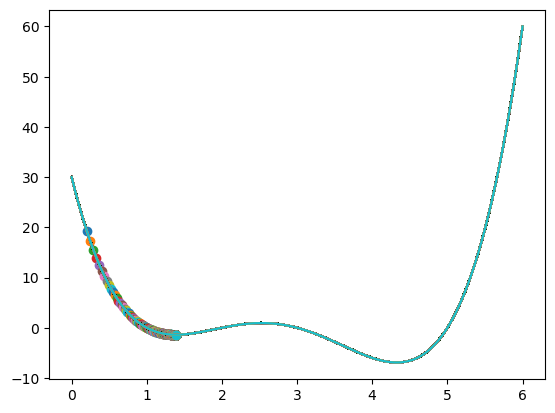

In [15]:
eta = .001
epsilon = .000001 #.00001 #.0001 #0.001 #.01

nb_iter = 1
x_prec =  0.1
x_current = x_prec - eta * df(x_prec)
while np.abs(x_prec - x_current) > epsilon:
    x_prec = x_current
    x_current = x_current - eta * df(x_current)
    nb_iter += 1
    myplot(x_current)

print('argmin: ', x_current)
print('f(argmin): ', f(x_current))
print('df(argmin): ', df(x_current))  
print('nombre iterations :' , nb_iter)

argmin:  4.32655760932551
f(argmin):  -6.914096314605217
df(argmin):  0.004470423289546943
nombre iterations : 349


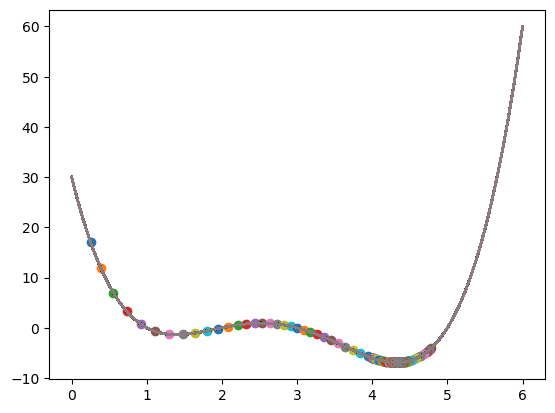

In [16]:
eta = .001
epsilon = .000001 #.00001 #.0001 #0.001 #.01
gamma = .95 #.9 #.5 #.3 #.2# .1

nb_iter = 1
x_prec =  .1
v = 0
v = gamma * v + eta * df(x_prec)
x_current = x_prec - v
while np.abs(x_prec - x_current) > epsilon:
    x_prec = x_current
    v = gamma * v + eta * df(x_prec)
    x_current = x_prec - v
    nb_iter += 1
    myplot(x_current)

print('argmin: ', x_current)
print('f(argmin): ', f(x_current))
print('df(argmin): ', df(x_current))  
print('nombre iterations :' , nb_iter)